,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB

Summary Statistics:


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Figure size 1000x600 with 0 Axes>

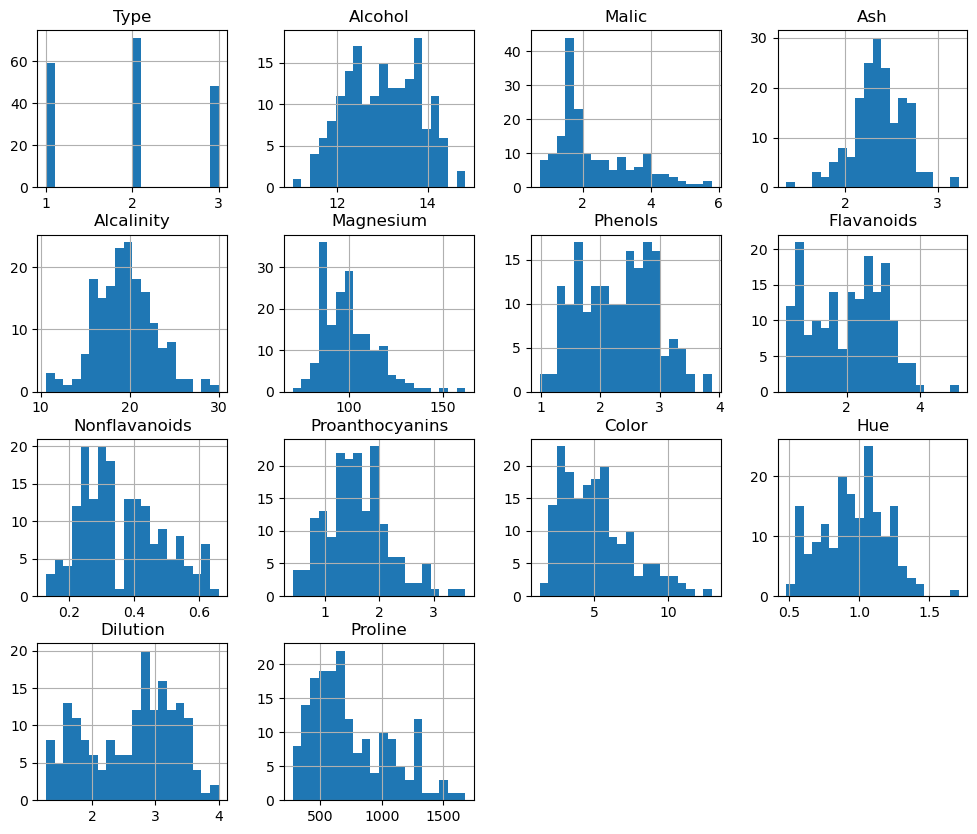

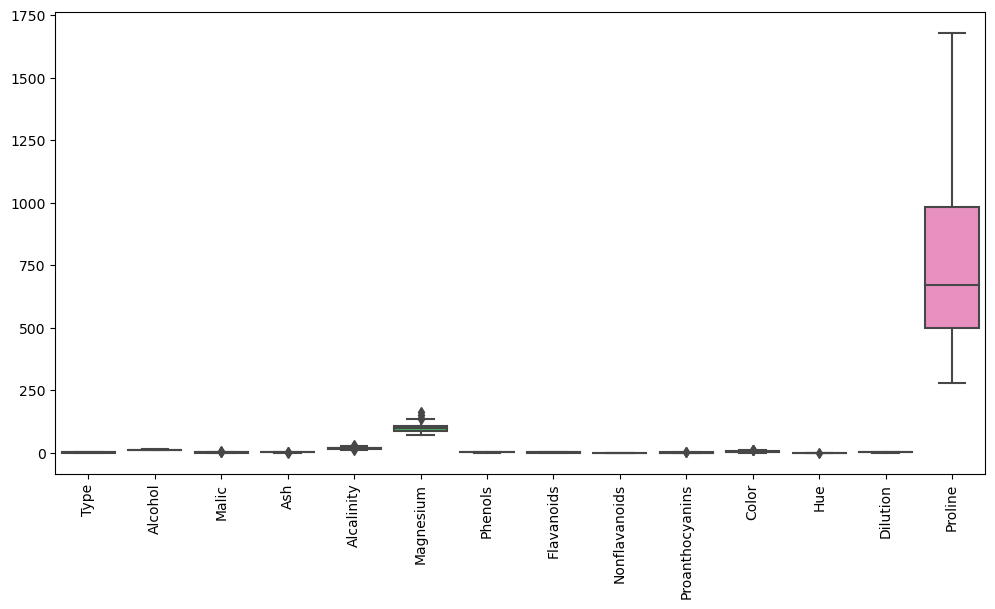

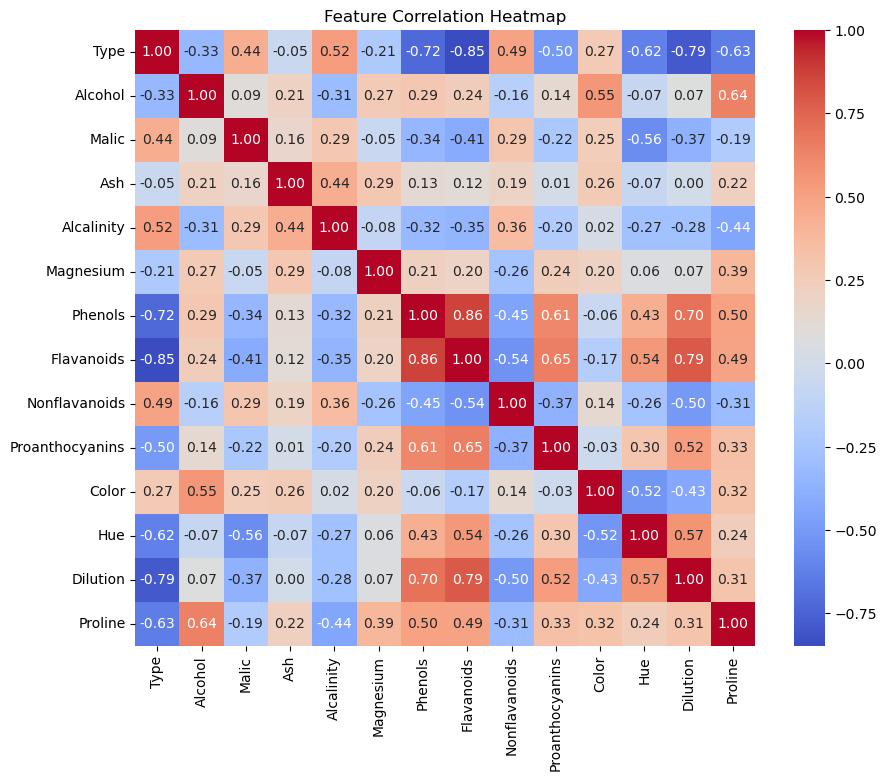

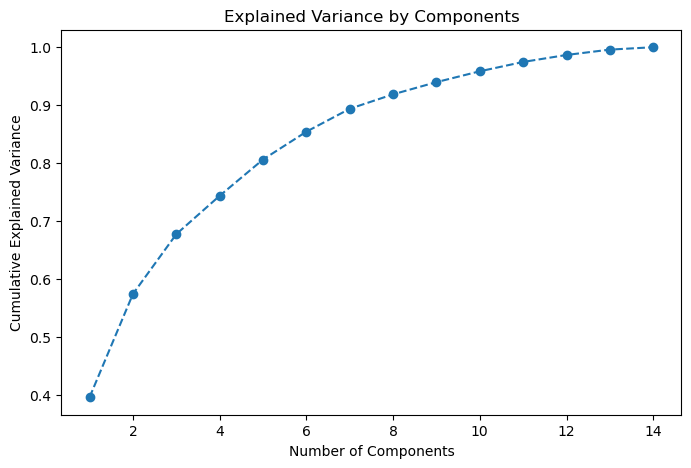

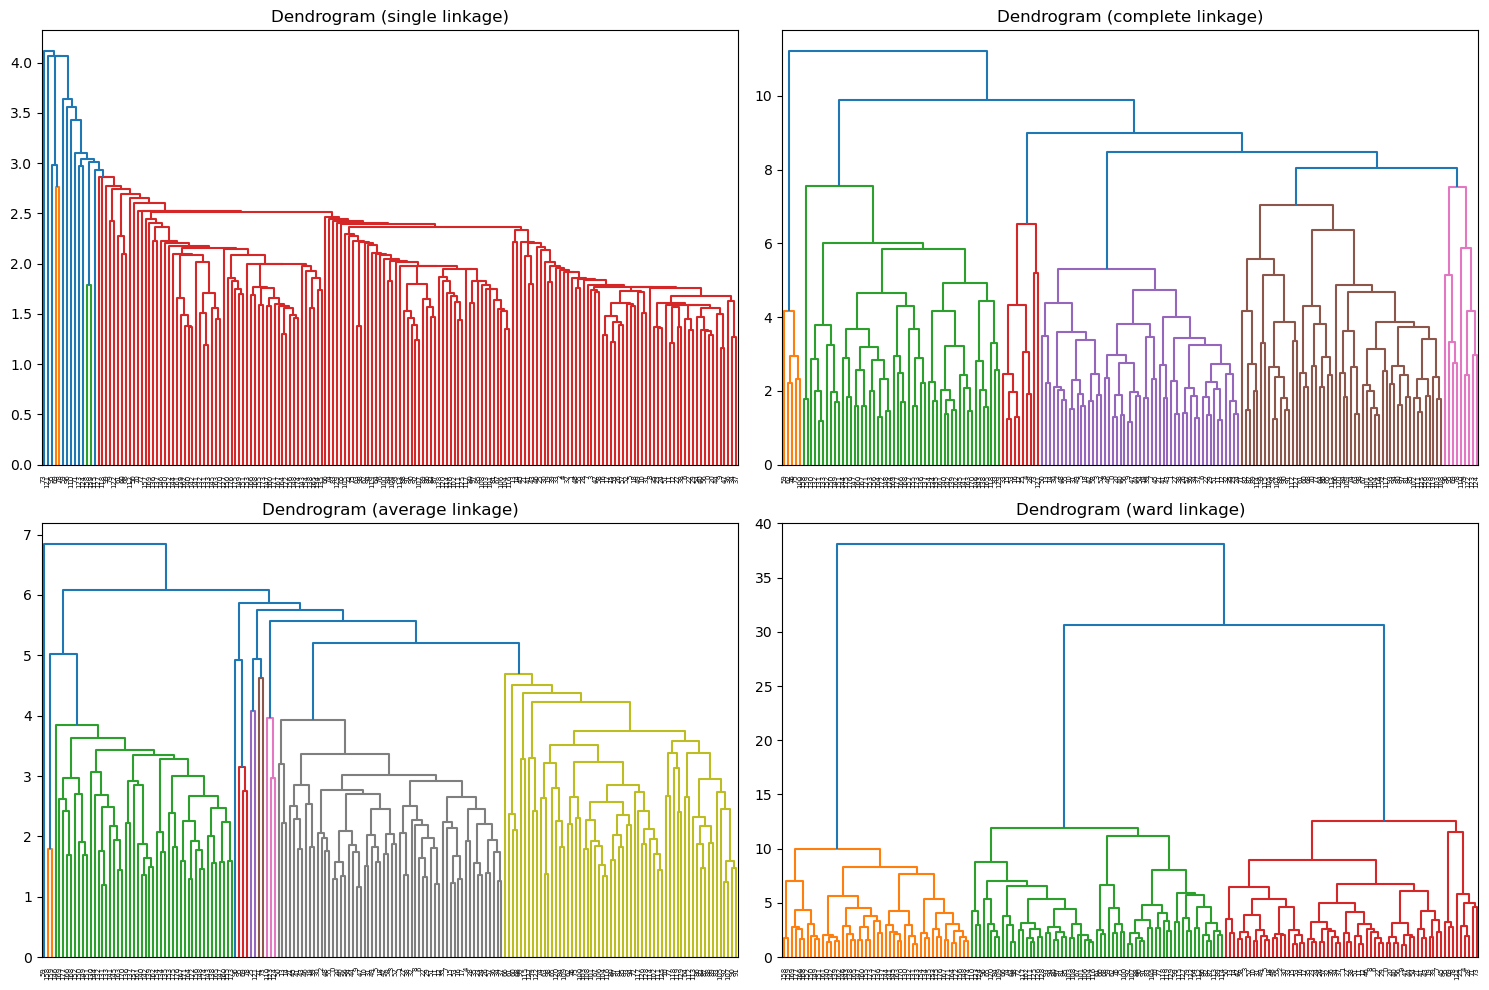

Original Data - Silhouette Score: 0.30648398324833453, Davies-Bouldin Score: 1.315707552261773
PCA Data - Silhouette Score: 0.32292055407233, Davies-Bouldin Score: 1.2578453408449175


C:\Users\Owner\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Owner\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


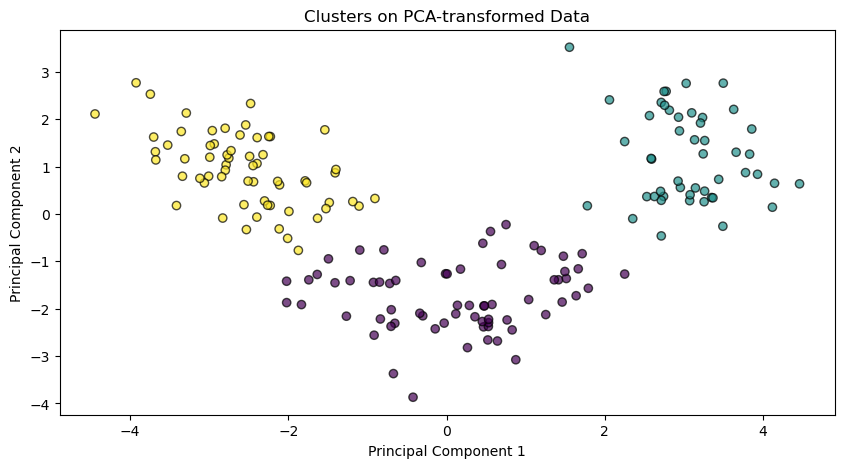

PCR Model - R² Score: 0.9280938076320201, RMSE: 0.20480546594591073


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\SVM\Recomandation system\wine.csv")
display(df.head())
print("Dataset Info:")
df.info()
print("\nSummary Statistics:")
display(df.describe())
plt.figure(figsize=(10,6))
df.hist(bins=20, figsize=(12,10))
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA()
pca.fit(df_scaled)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(df.columns) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by Components")
plt.show()

optimal_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
pca = PCA(n_components=optimal_components)
df_pca = pca.fit_transform(df_scaled)

# Hierarchical Clustering with Different Linkage & Distance Metrics
linkage_methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'cityblock', 'cosine']

plt.figure(figsize=(15, 10))
for i, method in enumerate(linkage_methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(df_scaled, method=method)
    dendrogram(Z)
    plt.title(f'Dendrogram ({method} linkage)')
plt.tight_layout()
plt.show()

# K-Means Clustering with PCA
kmeans_orig = KMeans(n_clusters=3, random_state=42)
kmeans_orig_labels = kmeans_orig.fit_predict(df_scaled)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(df_pca)

silhouette_orig = silhouette_score(df_scaled, kmeans_orig_labels)
davies_orig = davies_bouldin_score(df_scaled, kmeans_orig_labels)
silhouette_pca = silhouette_score(df_pca, kmeans_pca_labels)
davies_pca = davies_bouldin_score(df_pca, kmeans_pca_labels)

print(f"Original Data - Silhouette Score: {silhouette_orig}, Davies-Bouldin Score: {davies_orig}")
print(f"PCA Data - Silhouette Score: {silhouette_pca}, Davies-Bouldin Score: {davies_pca}")

plt.figure(figsize=(10,5))
plt.scatter(df_pca[:,0], df_pca[:,1], c=kmeans_pca_labels, cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clusters on PCA-transformed Data")
plt.show()

# Principal Component Regression (PCR)
X_train, X_test, y_train, y_test = train_test_split(df_pca, df.iloc[:, 0], test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"PCR Model - R² Score: {r2}, RMSE: {rmse}")
